In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import time

import nltk
from nltk.stem.porter import *
import string
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()
stemmer = PorterStemmer() 

In [2]:
# Take one of the books, with approx uniform distribution for its ratings
data = pd.read_csv('Paula_Hawkins-The-Girl-On-The-Train.csv', sep = '\t', header = None)

# Rename columns
data.columns = ['rating', 'tail', 'title', 'review']

# Remove the html tags
data['review'] = data['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

In [3]:
data.head()

,rating,tail,title,review
0,5.0,/gp/customer-reviews/R2QL7LO8IQZ7V2?ASIN=15946...,Best Hitchcock style mystery of voyeuristic ob...,Rachel is a woman who considers herself worthl...
1,2.0,/gp/customer-reviews/R1UP4LQV7KT04M?ASIN=15946...,ALCOHOLIC AMNESIA,"THE GIRL ON THE TRAIN is a dark, haunting and ..."
2,5.0,/gp/customer-reviews/R2UWX7IZYY45DQ?ASIN=15946...,The Gillian Flynn comparisons are utterly accu...,This was a premise to which I couldn't say no....
3,4.0,/gp/customer-reviews/R376RH2ZC94RRY?ASIN=15946...,This is a Must Read.,"Edgy, heart-wrenching, at times oddly funny. ..."
4,2.0,/gp/customer-reviews/R4R7KVVCO9YT5?ASIN=159463...,It gets thin and annoying by the end,After reading buzzy previews for a couple of m...


In [4]:
print('There are ', data.shape[0], ' reviews in this dataset')

There are  37139  reviews in this dataset


In [5]:
# We will remove the words that are used too often
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
                 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [19]:
# We will later emove punctuation
punctuation = set(string.punctuation)
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [7]:
# Define a function to tokenize the text
def process(x):
    
    # Take lowercases & tokenize the text
    doc = token.tokenize(''.join([w for w in x.lower() if w not in punctuation]))
    
    # Remove stopwords
    doc = [w for w in doc if w not in stopwords]
    
#     try:
    
#         # Carry the stemming part
#         doc = [stemmer.stem(w) for w in doc]
        
#     except Exception as e:
        
#         print(x)
    
    # Transformù to one string
    doc = ' '.join(w for w in doc)
    
    return doc

In [8]:
# Create a column with the tokenized reviews
data['processed'] = data['review'].apply(lambda x: process(x))

In [9]:
# data[data['review'] == "Don't know how I managed to finish this book, but I felt as though I'd been released from prison when I finally was able to put it down forever. Tedious, humorless, the characters are pretty much interchangeable - they all sound alike. The book has been called fast-paced, but in comparison to what? The OED? Kept waiting to be surprised, never was (unless I count being surprised that I was NOT surprised.)"]

In [10]:
# Remove the problematic review
# data = data.drop(data.index[[621]])

data = data.reset_index()
data = data.ix[:, 1:]

## TF-IDF preprocessing

#### Here, we will build features for documents, representing each words using its frequencies along documents (TF) and also its rarity (IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [13]:
# Construct the Document−Term TF−IDF matrix
m = TfidfVectorizer()
tfidf_matrix = m.fit_transform(data['processed'])
tfidf_matrix = tfidf_matrix.toarray() # convert to numpy array

In [14]:
tfidf_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
# Examine the size and the sparsity of the tfidf_matrix
size = tfidf_matrix.shape
sparsity = np.count_nonzero(tfidf_matrix) / tfidf_matrix.size

print('The matrix is of shape '+str(size)+' and its sparsity is '+str(sparsity))

The matrix is of shape (37139, 22985) and its sparsity is 0.000607302904761664


In [18]:
from sklearn.decomposition import PCA

start = time.time()

pca = PCA(n_components=50)
pca.fit(tfidf_matrix)
tfidf_matrix = pca.fit_transform(tfidf_matrix)

print(time.time() - start)

445.9133143424988


## Models

In [22]:
labels = data['rating']

In [23]:
from sklearn.cross_validation import train_test_split

# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

# Initialize the model
clf = LogisticRegression(C = 0.001)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

0.4988093376159668


In [37]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.45126548196015076

In [38]:
res = (np.abs(labels_predicted - labels_test))**2
res.sum() / len(labels_test)

2.83189732543529

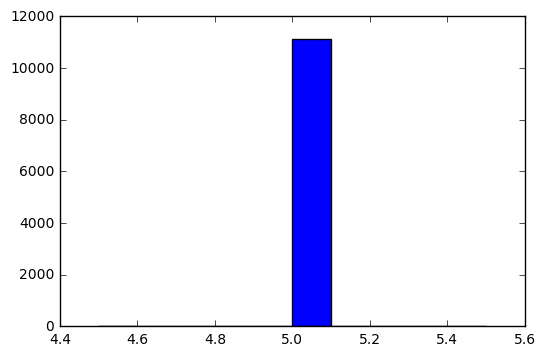

In [39]:
plt.hist(labels_predicted, color = 'b')
plt.show()

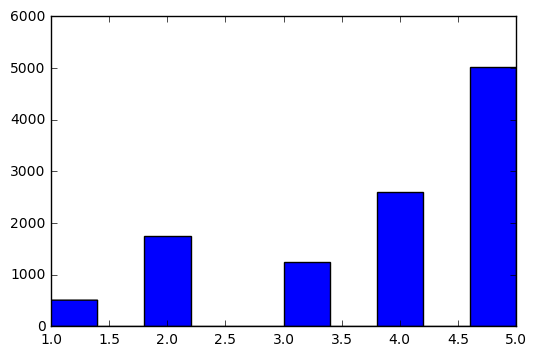

In [40]:
plt.hist(labels_test)
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

# Initialize the model
clf = KNeighborsClassifier()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

65.45863628387451


In [52]:
np.sum(np.abs(labels_predicted - labels_test) <= 2) / len(labels_test)

0.80344641895530422

{'boxes': [<matplotlib.lines.Line2D at 0x18c086ef438>],
 'caps': [<matplotlib.lines.Line2D at 0x18c0c5bfe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x18c0c5c6fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18c0c5c6828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18c0c5badd8>,
  <matplotlib.lines.Line2D at 0x18c0c5baf60>]}

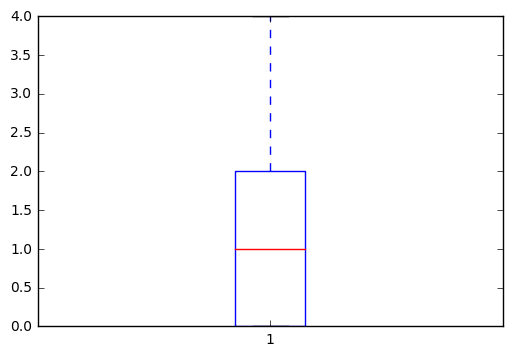

In [50]:
res = (np.abs(labels_predicted - labels_test))
plt.boxplot(res)

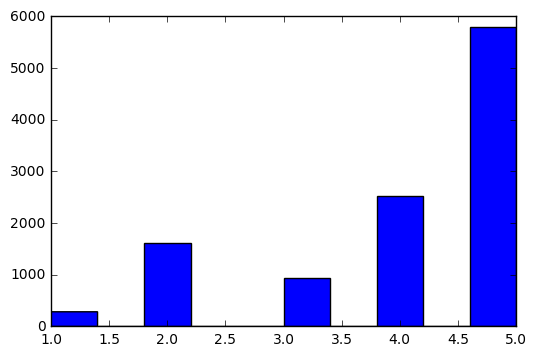

In [44]:
plt.hist(labels_predicted, color = 'b')
plt.show()

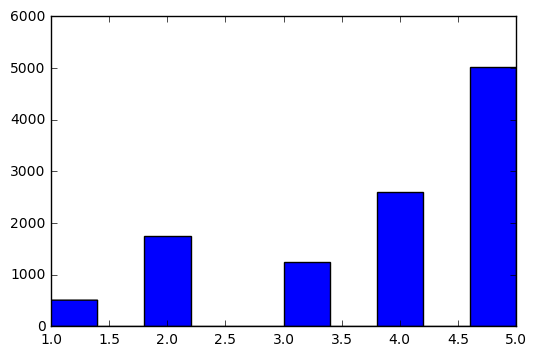

In [45]:
plt.hist(labels_test)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()

# Initialize the model
clf = GradientBoostingClassifier()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

# The following consists of unreliable sketches

## sentiment analysis

In [42]:
def sentiment(x):
    
    res = 0
    
    if x > 3:
        res = 1
        
    return res

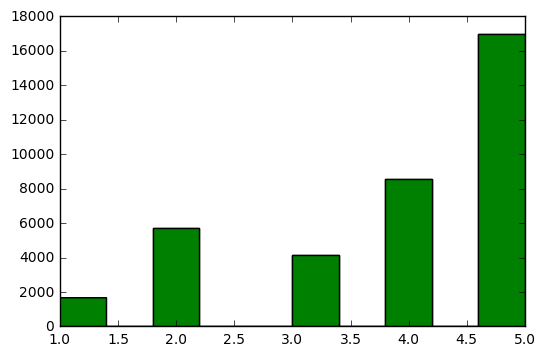

In [41]:
import matplotlib.pyplot as plt

plt.hist(data['rating'])
plt.show()

In [44]:
data['sentiment'] = data['rating'].apply(lambda x: sentiment(x))

In [46]:

# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(tfidf_matrix, data['sentiment'], test_size=0.3, random_state=42)

In [47]:
# Initialize the model
clf = LogisticRegression()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

In [54]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.68479626637946511

             precision    recall  f1-score   support

          0       0.38      0.02      0.05      3460
          1       0.69      0.98      0.81      7682

avg / total       0.59      0.68      0.57     11142

The accuracy score is 68.48%
Area under the ROC curve : 0.503287


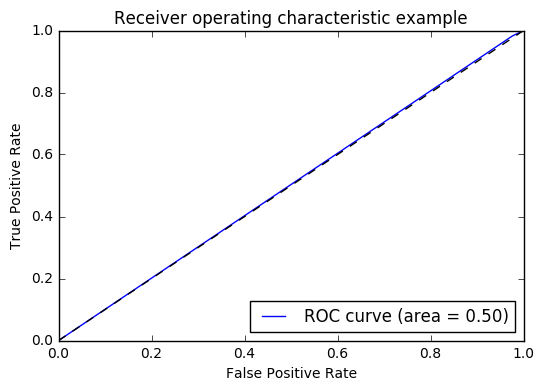

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Evaluation of the prediction
print(classification_report(labels_test, labels_predicted))
print("The accuracy score is {:.2%}".format(accuracy_score(labels_test, labels_predicted)))

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(labels_test, y_score)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
    
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

Damn! This is bad!

In [73]:
from sklearn.model_selection import StratifiedKFold
import time


In [77]:
skf = StratifiedKFold(n_splits=2)
y = data['sentiment']
scores = []

start = time.time()
for train_index, test_index in skf.split(tfidf_matrix, y):
    
    X_train, X_test = tfidf_matrix[train_index], tfidf_matrix[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize the model
    clf = LogisticRegression(penalty = 'l2', C = 0.05, solver = 'liblinear')
    print('OK')

    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Perform classific°ation of test data
    labels_predicted = clf.predict(X_test)
    score = np.sum(labels_predicted == y_test) / len(y_test)
    scores.append(score)
    
    print(score)
    
print(time.time() - start)

OK
0.688691437803
OK
0.688711762171
21.965462923049927


In [82]:
len(y_test[y_test == 1]) / len(y_test)

0.6887117621714778

In [84]:
np.unique(labels_predicted)

array([1], dtype=int64)

#### Random Forest

In [26]:
# Initialize the model
clf = RandomForestClassifier()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

In [29]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.38817088493986718

In [30]:
res = (np.abs(labels_predicted - labels_test))**2
res.sum() / len(labels_test)

2.7955483755160655

In [31]:
from sklearn.decomposition import PCA

In [32]:
# Initialize the model
clf = LogisticRegression()


pca = PCA(n_components=50)
pca.fit(data_train)
data_train = pca.fit_transform(data_train)
data_test = pca.fit_transform(data_test)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

In [33]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.45970202836115598